<a href="https://colab.research.google.com/github/Prab999/CSCI167/blob/main/project/project_167_nbahofA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Shallow model implementation
import torch
from google.colab import files
uploaded = files.upload()

Saving NBAHof_Final_Dataset.csv to NBAHof_Final_Dataset.csv


In [2]:
#simple tests to make sure dataset loaded properly
import pandas as pd
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
df = pd.read_csv("NBAHof_Final_Dataset.csv")
df.shape, df.head()
df.columns
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FULL_NAME         3093 non-null   object 
 1   AST               3093 non-null   int64  
 2   BLK               3093 non-null   int64  
 3   DREB              3093 non-null   int64  
 4   FG3A              3093 non-null   int64  
 5   FG3M              3093 non-null   int64  
 6   FG3_PCT           3093 non-null   float64
 7   FGA               3093 non-null   int64  
 8   FGM               3093 non-null   int64  
 9   FG_PCT            3093 non-null   float64
 10  FTA               3093 non-null   int64  
 11  FTM               3093 non-null   int64  
 12  FT_PCT            3093 non-null   float64
 13  GP                3093 non-null   int64  
 14  GS                3093 non-null   int64  
 15  MIN               3093 non-null   int64  
 16  OREB              3093 non-null   int64  


,0
FULL_NAME,0
AST,0
BLK,0
DREB,0
FG3A,0
FG3M,0
FG3_PCT,0
FGA,0
FGM,0
FG_PCT,0


In [3]:
# Training target, classification - is the player an Hof
target_col = "Is Hall of Famer"

#Dropping columns from test, Most added as ways to merge datasets
drop_cols = [
    "FULL_NAME",
    "FIRST_NAME",
    "LAST_NAME",
    "FULL_NAME_LOWER",
    "FIRST_NAME_LOWER",
    "LAST_NAME_LOWER",
    "full_name_lower",
    "name_key",
]

feature_df = df.drop(columns=drop_cols + [target_col])
print("Feature shape", feature_df.shape)
feature_df.head()

Feature shape (3093, 38)


,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,ALL_NBA_SECOND,ALL_NBA_THIRD,IS_ALL_NBA,ALL_DEF_TOTAL,ALL_DEF_FIRST,ALL_DEF_SECOND,IS_ALL_DEF,Finals Played,Finals Won,Is Champion
0,14,12,95,1,0,0.00,216,109,0.45,52,...,0,0,0,0,0,0,0,0,0,0
1,29,7,66,198,73,0.36,263,102,0.38,36,...,0,0,0,0,0,0,0,0,0,0
2,163,48,344,40,12,0.27,898,424,0.45,384,...,0,0,0,0,0,0,0,0,0,0
3,39,12,72,10,2,0.26,252,105,0.37,76,...,0,0,0,0,0,0,0,0,0,0
4,231,5,96,149,53,0.32,883,390,0.44,129,...,0,0,0,0,0,0,0,0,0,0


In [4]:
feature_df = feature_df.copy()
#Currently data set lists active players retirement year as a NAN, swapping this
#with the year 2030
feature_df["RETIREMENT_YEAR"] = feature_df["RETIREMENT_YEAR"].fillna(2030)
feature_df["RETIREMENT_YEAR"].isna().sum()

np.int64(0)

In [5]:
import numpy as np

#define X and Y arrays as features and labels
X = feature_df.values.astype("float32")
y = df[target_col].values.astype("float32")
#tests
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Positive rate (HOF %):", y.mean())

X shape: (3093, 38)
y shape: (3093,)
Positive rate (HOF %): 0.01842871


In [6]:
#Defining traing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

print("Train size:", X_train.shape[0])
print("Val size:", X_val.shape[0])
print("Train positives:", int((y_train == 1).sum()))
print("Val positives:", int((y_val == 1).sum()))

Train size: 2474
Val size: 619
Train positives: 46
Val positives: 11


In [7]:
#Scale features, mean 0 and variance 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled val shape:", X_val_scaled.shape)
print("Train mean (approx):", X_train_scaled.mean())
print("Train std (approx):", X_train_scaled.std())

Scaled train shape: (2474, 38)
Scaled val shape: (619, 38)
Train mean (approx): -8.115341e-10
Train std (approx): 1.0


In [8]:
import torch
from torch.utils.data import Dataset, DataLoader

#Wrap arrays in pytorch dataset, using dataloader for
#mini-batch training
class NBADataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.from_numpy(X).float()
    self.y = torch.from_numpy(y).float()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

batch_size = 32

#train and validation sets
train_ds = NBADataset(X_train_scaled, y_train)
val_ds = NBADataset(X_val_scaled, y_val)

#data loaders
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=256, shuffle=False)

for xb, yb in train_loader:
    print("Batch X shape:", xb.shape)
    print("Batch y shape:", yb.shape)
    break

Batch X shape: torch.Size([32, 38])
Batch y shape: torch.Size([32])


In [9]:
#Shallow model implementation, 1 hidden layer, theta = input hidden weights
#phi = hidden output weights, reLu activation in hidden layer
import torch.nn as nn

#input dimensions, num of features (columns)
input_dim = X_train_scaled.shape[1]
#64 hidden units after testing
hidden_dim = 64

#values for theta, phi, activation, and output layer
class ShallowNetSmall(nn.Module):
  def __init__(self, input_dim, hidden_dim):
    super().__init__()
    self.theta = nn.Linear(input_dim, hidden_dim)
    self.phi = nn.Linear(hidden_dim, 1)

  def forward(self, x):
    h = torch.relu(self.theta(x))
    y = self.phi(h)
    return y

model = ShallowNetSmall(input_dim, hidden_dim)
print(model)

ShallowNetSmall(
  (theta): Linear(in_features=38, out_features=64, bias=True)
  (phi): Linear(in_features=64, out_features=1, bias=True)
)


In [10]:
import torch.optim as optim
#Loss function and optimizer
#Binary cross-entropy loss with Logits,
#standard loss for binary class, adam optimizer for faster convergence

criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
print(device, criterion, optimizer)

cpu BCEWithLogitsLoss() Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [11]:
#defining training and validation loops per epoch
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    running_correct = 0
    total = 0

    #Loop in minibatches
    for xb, yb in dataloader:
        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()

        # forward pass
        logits = model(xb).view(-1)
        loss = criterion(logits, yb.float())

        # backward pass
        loss.backward()
        optimizer.step()

        # stats - acculate loss
        running_loss += loss.item() * xb.size(0)

        # computation predictions and accuracy
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).float()
        running_correct += (preds == yb).sum().item()
        total += xb.size(0)

    #avg loss and accuracy over training samples
    epoch_loss = running_loss / total
    epoch_acc  = running_correct / total
    return epoch_loss, epoch_acc

#Validation loop with no gradient computation
@torch.no_grad()
def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_correct = 0
    total = 0

    for xb, yb in dataloader:
        xb = xb.to(device)
        yb = yb.to(device)

        logits = model(xb).view(-1)
        loss = criterion(logits, yb.float())    # BCE loss

        running_loss += loss.item() * xb.size(0)

        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).float()

        running_correct += (preds == yb).sum().item()
        total += xb.size(0)

    epoch_loss = running_loss / total
    epoch_acc  = running_correct / total
    return epoch_loss, epoch_acc



In [12]:
#Main training loop, stores history for graphs
num_epochs = 20

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

#Per pass over training set, validation set
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_one_epoch(
        model, train_loader, optimizer, criterion, device
    )
    val_loss, val_acc = evaluate(
        model, val_loader, criterion, device
    )

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(
        f"Epoch {epoch:02d} | "
        f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
        f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}"
    )


Epoch 01 | Train Loss: 0.3141, Train Acc: 0.9806 | Val Loss: 0.1405, Val Acc: 0.9871
Epoch 02 | Train Loss: 0.0991, Train Acc: 0.9854 | Val Loss: 0.0711, Val Acc: 0.9887
Epoch 03 | Train Loss: 0.0568, Train Acc: 0.9879 | Val Loss: 0.0519, Val Acc: 0.9887
Epoch 04 | Train Loss: 0.0428, Train Acc: 0.9887 | Val Loss: 0.0450, Val Acc: 0.9903
Epoch 05 | Train Loss: 0.0348, Train Acc: 0.9903 | Val Loss: 0.0430, Val Acc: 0.9903
Epoch 06 | Train Loss: 0.0313, Train Acc: 0.9915 | Val Loss: 0.0399, Val Acc: 0.9919
Epoch 07 | Train Loss: 0.0278, Train Acc: 0.9915 | Val Loss: 0.0404, Val Acc: 0.9887
Epoch 08 | Train Loss: 0.0256, Train Acc: 0.9923 | Val Loss: 0.0372, Val Acc: 0.9919
Epoch 09 | Train Loss: 0.0240, Train Acc: 0.9931 | Val Loss: 0.0369, Val Acc: 0.9919
Epoch 10 | Train Loss: 0.0226, Train Acc: 0.9931 | Val Loss: 0.0366, Val Acc: 0.9903
Epoch 11 | Train Loss: 0.0214, Train Acc: 0.9935 | Val Loss: 0.0347, Val Acc: 0.9919
Epoch 12 | Train Loss: 0.0204, Train Acc: 0.9935 | Val Loss: 0.03

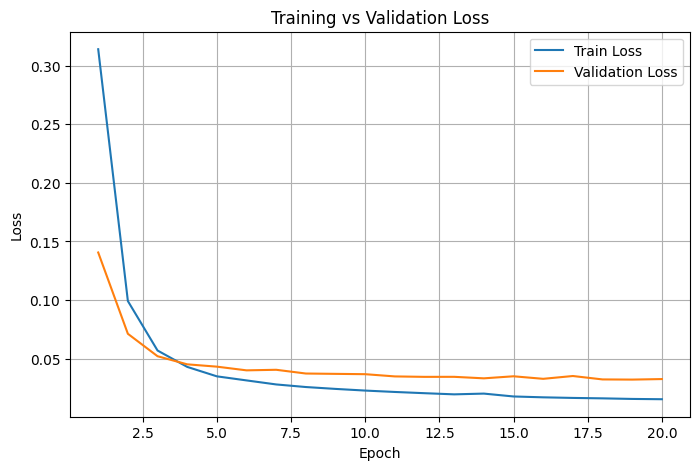

In [13]:
#graphs
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

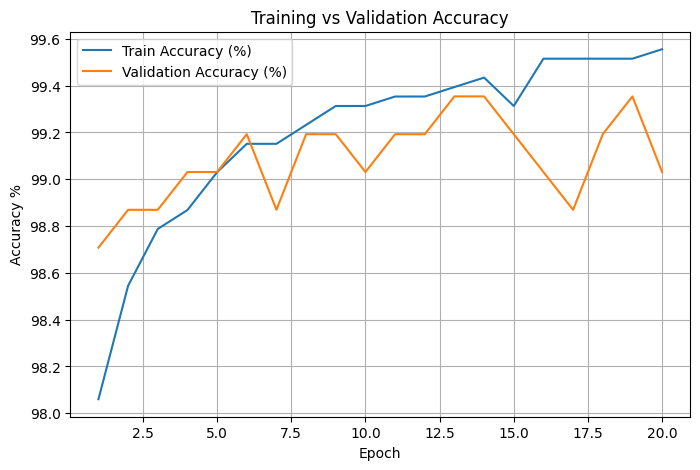

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, [a*100 for a in train_accuracies], label="Train Accuracy (%)")
plt.plot(epochs, [a*100 for a in val_accuracies], label="Validation Accuracy (%)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
#got a bit confused with importants, in future archtectures imported all at once
import numpy as np
import torch
#Provides data with actual counts, easier to see if something is making a difference
model.eval()

all_logits = []
all_labels = []

with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        logits = model(xb).view(-1)
        all_logits.append(logits.cpu())
        all_labels.append(yb.cpu())

all_logits = torch.cat(all_logits)
all_labels = torch.cat(all_labels)

probs = torch.sigmoid(all_logits)
preds = (probs >= 0.5).float()

# basic counts
total = len(all_labels)
positives = int((all_labels == 1).sum())
predicted_positives = int((preds == 1).sum())
correct_positives = int(((preds == 1) & (all_labels == 1)).sum())
correct_negatives = int(((preds == 0) & (all_labels == 0)).sum())

print("Total val samples:", total)
print("True HOF (label=1):", positives)
print("Predicted HOF (pred=1):", predicted_positives)
print("Correctly predicted HOF (TP):", correct_positives)
print("Correctly predicted non-HOF (TN):", correct_negatives)
print(criterion)


Total val samples: 619
True HOF (label=1): 11
Predicted HOF (pred=1): 7
Correctly predicted HOF (TP): 6
Correctly predicted non-HOF (TN): 607
BCEWithLogitsLoss()
